# **Task#2**

# **From the given iris dataset, predict the optimum number of clusters and represent it visually**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [10]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Accuracy Score When N_Clusters= 1 and Random_State= 1 == 33.33%
Accuracy Score When N_Clusters= 3 and Random_State= 3 == 24.00%
Accuracy Score When N_Clusters= 5 and Random_State= 5 == 16.00%
Accuracy Score When N_Clusters= 7 and Random_State= 7 == 44.67%
Accuracy Score When N_Clusters= 9 and Random_State= 9 == 14.67%
Accuracy Score When N_Clusters= 11 and Random_State= 11 == 0.67%
Accuracy Score When N_Clusters= 13 and Random_State= 13 == 4.00%
Accuracy Score When N_Clusters= 15 and Random_State= 15 == 16.00%
Accuracy Score When N_Clusters= 17 and Random_State= 17 == 0.00%
Accuracy Score When N_Clusters= 19 and Random_State= 19 == 1.33%
Accuracy Score When N_Clusters= 21 and Random_State= 21 == 0.00%
Accuracy Score When N_Clusters= 23 and Random_State= 23 == 9.33%


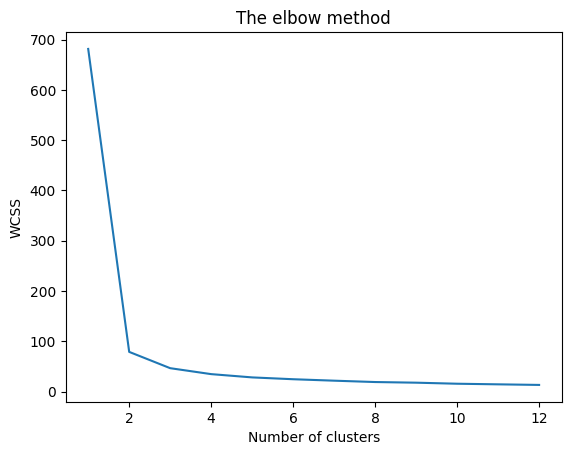

In [124]:
X = iris.data
y = iris.target

from sklearn.cluster import KMeans
wcss = []

no=25
for i in range(1,no,2):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state =i)
  kmeans.fit(X)
  y_pred = kmeans.predict(X)
  accuracy = accuracy_score(y, y_pred)
  print(f"Accuracy Score When N_Clusters= {i} and Random_State= {i} == {accuracy*100:.2f}%")
  wcss.append(kmeans.inertia_)


plt.plot(range(1,13), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [120]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 7)

y_kmeans = kmeans.fit_predict(X)
accuracy = accuracy_score(y, y_kmeans)
print("Accuracy Score",accuracy)


Accuracy Score 0.8933333333333333


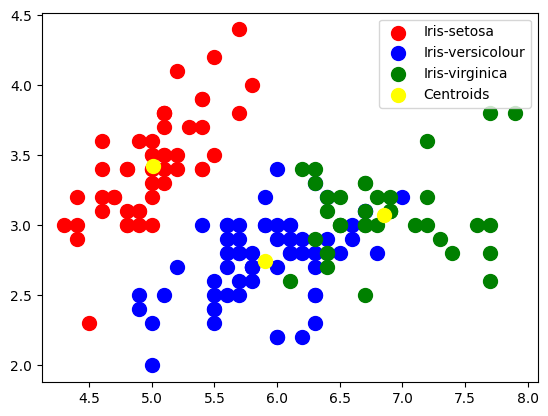

In [121]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')


plt.legend()